# Image inpainting by Gaussian Process with DIP kernel

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from GP_DIP_utils import *
from skimage.io import imsave
from skimage.measure import compare_psnr

## Gaussian Process Kernels from Deep Image Prior

### Opt 1: To Sample from the 2-layer skip network, run:

#### Note: In our experiment, we found that a large amount of samples (e.g. over 500K samples) is necessary for empirical kernel estimation. 

In [ ]:
samples = prior_sampling(num_samples = 500000, map_size = 100)

### Opt 2: To compute the kernel from samples:

In [ ]:
kernel = compute_kernel(samples)

### Opt 3: Download the pre-computed DIP kernel from 2-layer skip net, save it to ./data/kernels/
#### Download the kernels used in our experiments: 
* [DIP kernel estimated from 660K samples from 2-layer skip net](https://www.dropbox.com/s/i0g1ldewg8kxpxi/kernel_2layer_skip_660K.npy?dl=0)

## DIP kernel from 2-layer skip net

### Load kernel and target image 

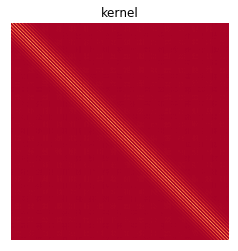

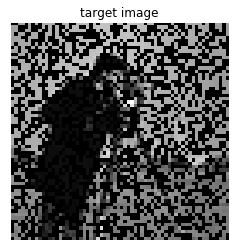

In [3]:
kernel = load_objs('data/kernels/kernel_2layer_skip_660K.npy')
np_plot(kernel, 'kernel', opt='map') 
img_np, img_mask_np, train_x, train_y, test_x = load_test_data_inpainting() 
np_plot(img_np * img_mask_np, 'target image', opt = 'Grayscale')

### Inpainting by the GP with the empricial kernel 

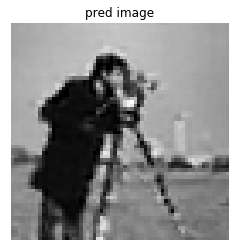

PSNR:26.34


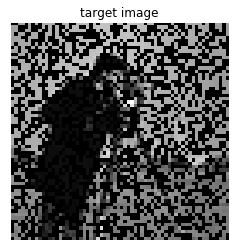

In [4]:
inpainted_img, masked_img = GP_DIP_inpaint(img_np, img_mask_np, kernel)
np_plot(inpainted_img, 'pred image', opt = 'Grayscale')
print("PSNR:%.2f" % compare_psnr(inpainted_img, img_np))
np_plot(masked_img, 'target image', opt = 'Grayscale')

### Visualize sample from the Gaussian Process

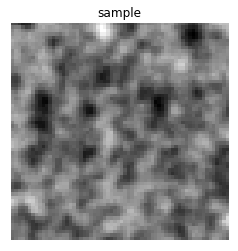

In [5]:
gp_sample = np.random.multivariate_normal(np.ones(64**2)*0.0, kernel).reshape(64,64)
np_plot(gp_sample[np.newaxis, :], title = 'sample', opt='Grayscale')